In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
titanic=pd.read_csv('titan_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johanson, Mr. Jakob Alfred",male,347082,B96 B98,S
freq,1,577,7,4,644


C:\Users\Ujjual Ramachandran\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


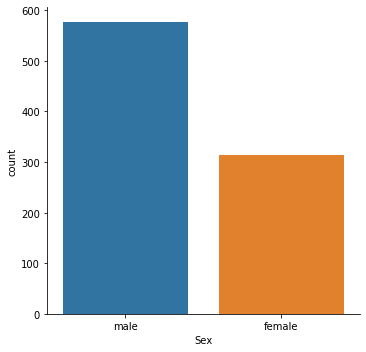

In [11]:
# Number of female and male passengers
sns.factorplot("Sex",data=titanic,kind="count")

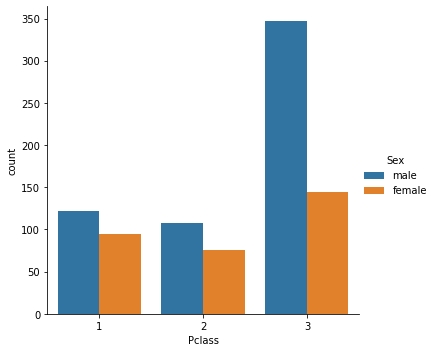

In [13]:
sns.factorplot("Pclass",data=titanic,kind="count",hue="Sex")

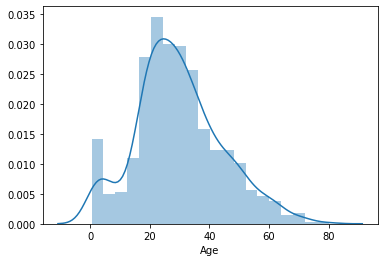

In [18]:
sns.distplot(titanic["Age"].dropna(),hist=True)

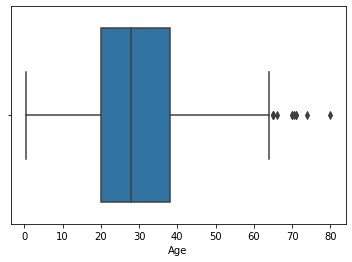

In [22]:
sns.boxplot(titanic["Age"])

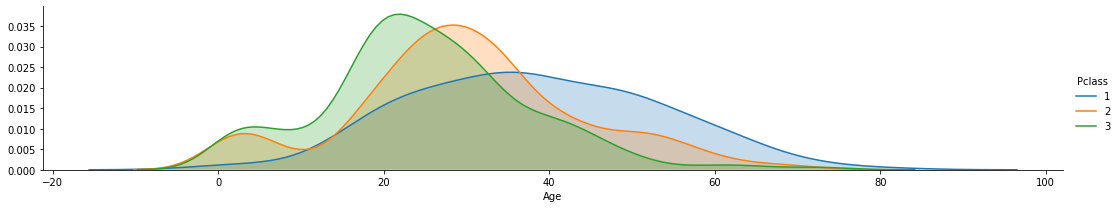

In [35]:
plot=sns.FacetGrid(titanic,hue="Pclass",legend_out=True,aspect=5)
plot.map(sns.kdeplot,"Age",shade=True)
plot.add_legend()
#1st class passengers are generally middle aged
#2nd class and 3rd class passengers belong to the younger population

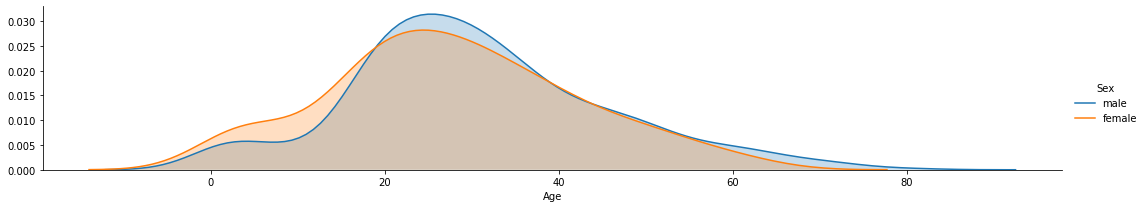

In [37]:
plot=sns.FacetGrid(titanic,hue="Sex",legend_out=True,aspect=5)
plot.map(sns.kdeplot,"Age",shade=True)
plot.add_legend()
# there's really not much of a difference, but it can be observed that there more younger female population onboard.

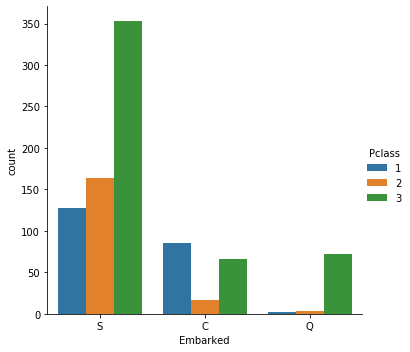

In [40]:
sns.factorplot("Embarked",data=titanic,hue="Pclass",kind="count")
#Most of the passengers embarked from Southampton
#There's only few from Queens and it can be observed that from those who boarded the 
#titanic from Queens were from upper class families

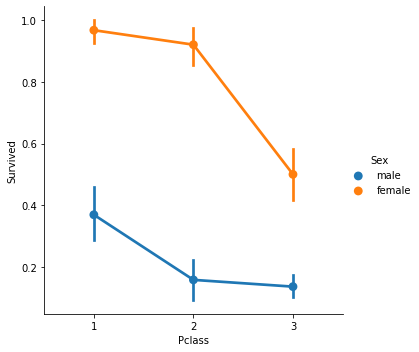

In [43]:
sns.factorplot("Pclass","Survived",hue="Sex",data=titanic)
#Lower class passengers had a lower survival rate
#The ship followed the women and children first protocol while putting passengers in the lifeboats.
#Hence, women had a better chance at survival

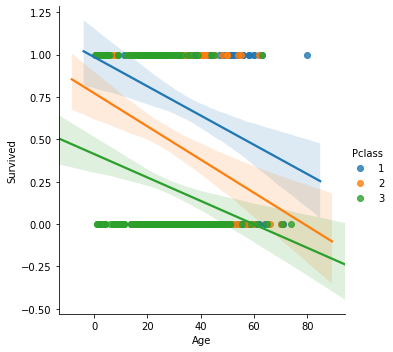

In [46]:
sns.lmplot("Age","Survived",hue="Pclass",data=titanic)
#3rd class passengers clearly had lesser chance of survival